# Construcción de un regresor variable

In [23]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [24]:
#name file input data
input_file = 'data_singlevar_regr.txt'

data = np.loadtxt(input_file,delimiter=',')

X, y = data[:, :-1], data[:,-1]

#Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

#Training data 
X_train, y_train = X[:num_training] , y[:num_training]

#Test data
X_test, y_test = X[num_training:] , y[num_training:]


In [25]:
#Crea el regresor linear
regressor  = linear_model.LinearRegression()
#Entrenamiento
regressor.fit(X_train, y_train)

#Datos de predicción
y_test_pred = regressor.predict(X_test)

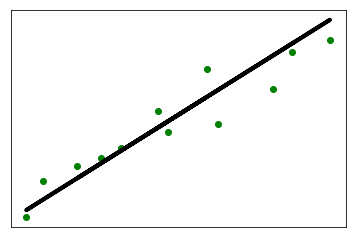

In [26]:
#Graficar  resultado
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
# Compute performance metrics
print("Rendimiento del regresor lineal:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test,
y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test,
y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test,
y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,
y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Rendimiento del regresor lineal:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [33]:
"""
Es posible guardar el modelo anterior para usarlo luego
esto se hace con el metodo pickle de python
"""
#name file save model
output_model_file = 'model.pkl'

#Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

#load the model
with open(output_model_file, 'rb') as  f:
    regressor_model = pickle.load(f)

#Usando el modelo    
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolte error = ", round(sm.mean_absolute_error(  
      y_test,y_test_pred_new),2))



New mean absolte error =  0.59
